# Анализ датасета книг

Датасет - Goodreads' Best Books Ever 

https://www.kaggle.com/datasets/meetnaren/goodreads-best-books?select=book_data.csv





In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [2]:
from google.colab import files

In [3]:
df = pd.read_csv('/content/sample_data/book_data.csv')
df.head(4)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...


# Подготовка данных 

Подготовим данные для анализа: уберем столбцы **image_url, book_isbn, book_desc, book_authors, book_edition, book_title**

In [4]:
df = df.drop(['image_url', 'book_isbn', 'book_desc', 'book_authors', 'book_edition', 'book_title'], axis=1)

df.head(4)

,book_format,book_pages,book_rating,book_rating_count,book_review_count,genres
0,Hardcover,374 pages,4.33,5519135,160706,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,Paperback,870 pages,4.48,2041594,33264,Fantasy|Young Adult|Fiction
2,Paperback,324 pages,4.27,3745197,79450,Classics|Fiction|Historical|Historical Fiction...
3,Paperback,279 pages,4.25,2453620,54322,Classics|Fiction|Romance


Представим столбцы **book_pages** и **book_format** в числовом формате: 

В **book_format** сделаем 3 категории: 0 - бумажная обложка (объединим значения Paperback и Mass Market Paperback, 1 - твердая обложка, 2 - электронный формат (объединим значения Kindle Edition и ebook)

В **book_pages** уберем слово page

In [5]:
def format_pages(row):
  if not pd.isna(row['book_pages']):
    return int(row['book_pages'].split(' ')[0])

df['book_pages'] = df.apply(lambda row: format_pages(row), axis=1)

In [6]:
def format_book(row):
  if not pd.isna(row['book_format']):
    if row['book_format'] in ['Paperback', 'Mass Market Paperback']:
      return 0
    elif row['book_format'] in ['Hardcover']:
      return 1
    elif row['book_format'] in ['Kindle Edition', 'ebook']:
      return 2
    else:
      return np.NaN

df['book_format'] = df.apply(lambda row: format_book(row), axis=1)

In [7]:
def format_genre(row):
  if not pd.isna(row['genres']):
    return row['genres'].split('|')[0]

df['genres'] = df.apply(lambda row: format_genre(row), axis=1)

In [8]:
print(f'В датасете {sum([sum(df[col].isnull()) for col in df])} пропущенных значений')

В датасете 8539 пропущенных значений


Заменим в нужных нам столбцах NaN на медианное значение и удалим строки, где не определен жанр


In [9]:
df['book_format'] = df['book_format'].fillna(df['book_format'].median())
df['book_pages'] = df['book_pages'].fillna(df['book_pages'].median())
df['book_rating'] = df['book_rating'].fillna(df['book_rating'].median())
df['book_rating_count'] = df['book_rating_count'].fillna(df['book_rating_count'].median())
df['book_review_count'] = df['book_review_count'].fillna(df['book_review_count'].median())

df.dropna(subset=['genres'], inplace=True)

In [10]:
df.describe()

,book_format,book_pages,book_rating,book_rating_count,book_review_count
count,51059.000000,51059.000000,51059.000000,5.105900e+04,51059.000000
mean,0.501361,341.876437,4.006074,4.625927e+04,2138.538534
std,0.720764,254.208364,0.298442,2.190145e+05,7848.260391
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,225.000000,3.820000,6.310000e+02,50.000000
50%,0.000000,310.000000,4.020000,3.345000e+03,223.000000
75%,1.000000,400.000000,4.200000,1.428800e+04,911.000000
max,2.000000,14777.000000,5.000000,5.588580e+06,160776.000000


In [11]:
t = df['genres'].mode()
print(f'Самый популярный жанр: {list(t)}')

Самый популярный жанр: ['Fantasy']


In [12]:
t = df['book_pages'].mode()
print(f'Самое популярное количество страниц: {list(t)}')

Самое популярное количество страниц: [310.0]


In [13]:
t = df['book_rating'].mode()
print(f'Самый популярный рейтинг: {list(t)}')

Самый популярный рейтинг: [4.0]


In [14]:
t = df['book_format'].mode()
print(f'Самый популярный формат: {list(t)} - Мягкая обложка')

Самый популярный формат: [0.0] - Мягкая обложка


# Анализ

Посмотрим внимательно на следующие значения:

* book_pages - количество страниц в книге
* book_rating - рейтинг книги
* book_rating_count - количество оценок книги
* book_review_count - количество ревью на книгу 
* book_format - формат книги 

Среднее количество страниц - 336, что очень близко к значению 50% квантиля, стоит проверить количество страниц на нормальность

Средний рейтинг так же очень близок к зачению 50% квантиля, стоит проверить рейтинг на нормальность

Среднее количество оценок и ревью сильно отличается от их медианы - скорее всего популярные книги сильно увеличивают среднее значение 

Формат книги - как можно видеть, большая часть книг в выборке - в бумажном формате 

# Проверка параметров на нормальное распределение

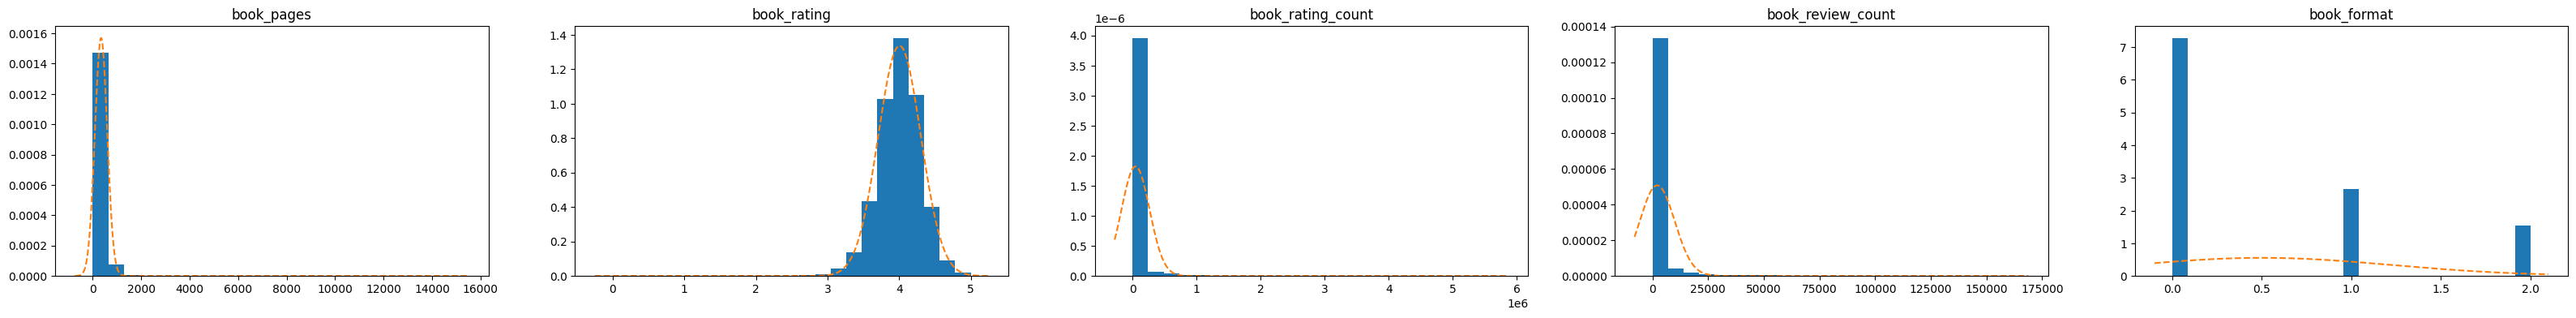

In [15]:
keys = ['book_pages', 'book_rating', 'book_rating_count', 'book_review_count', 'book_format']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Как можно видеть по графикам, **book_rating_count**, **book_review_count** и **book_format** распределены точно не нормально 

Построим Q-Q кривую, которая покажет отклонение реального значения квантиля от его теоретического значения


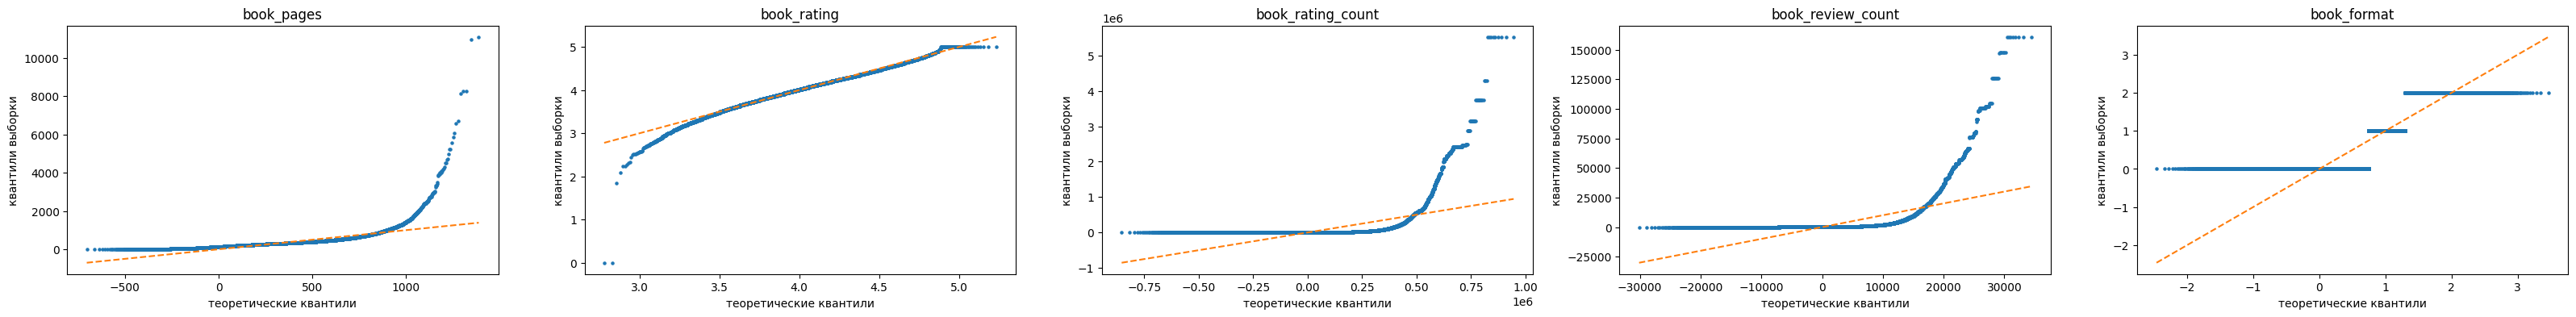

In [16]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Еще раз убеждаемся, что **book_rating_count**, **book_review_count** и **book_format** распределены не нормально, в то время как **book_pages** и **book_rating** распределены относительно нормально 

Оценим нормальность выборок также на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными

In [17]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

book_pages
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8813529446326799
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9767523844963669
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9895806811727609

book_rating
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7140758730096555
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9544252727237118
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9929101627528937

book_rating_count
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9647662508078889
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9771832585832076
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9871129477663095

book_review_count
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9515070800446542
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.97144479915392
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9820599698388139

book_format
1 sigma(s)
	theoretical:	0.6826894921370859
	sample

Из всех параметров **book_rating** ближе всего к нормальному распределению, **book_pages** немного дальше, скорее всего из-за того, что в выборке есть книги большого объема: 5000 страниц и выше

# Визуализация

Проверим гопотезу о том, что существует зависимость между **book_rating** и **book_pages** 

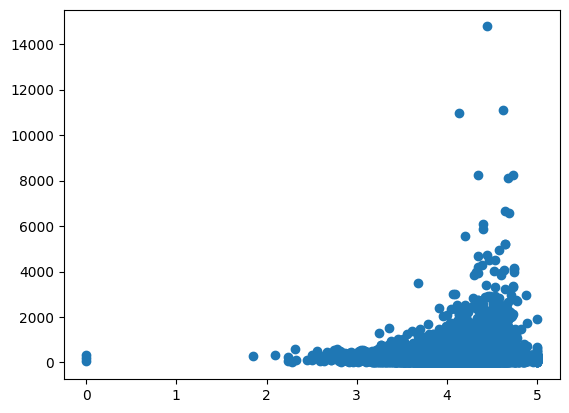

In [18]:
plt.scatter(df['book_rating'], df['book_pages'])
plt.show()

По графику плохо понятно, есть ли зависимость, поэтому рассчитыаем коэффициенты регрессии и значения для каждого из значений выборок

In [19]:
ones = np.ones((51059,1))
x_pot = np.hstack((ones, df['book_rating'].values.reshape(51059,1)))

XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['book_pages'])
z = x_pot.dot(b)
e = df['book_pages'] - z

R = 1 - sum([num ** 2 for num in e]) / sum([num ** 2 for num in np.array(df['book_pages'])])
R

0.6528556906756923

Как мы видим, коэффициент регрессии говорит, что зависимость скорее всего существует

Проверим это и построим визуализацию зависимости 

In [20]:
b1 = np.cov(df['book_pages'], df['book_rating'], ddof=1)[0, 1] / np.var(df['book_pages'], ddof=1)
b0 = df['book_rating'].mean() - b1 * df['book_pages'].mean()

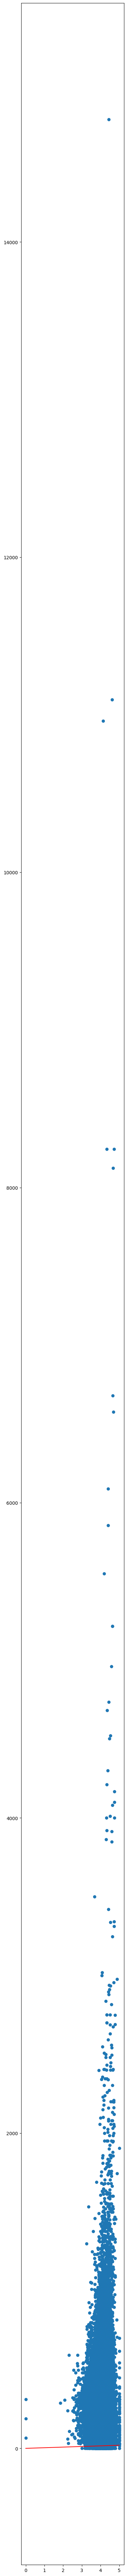

In [21]:
plt.figure(figsize=(4,100))
plt.scatter(df['book_rating'], df['book_pages'])
x = np.linspace(0, 5, 1000)
y = b0*x + b1
plt.plot(x, y, color = 'r')
plt.show()

Как видно из графика, существует зависимость между рейтингом и количеством страниц

# Проверим гипотезы

In [22]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.01

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

# Есть ли зависимость между **book_review_count** и **book_rating_count**?

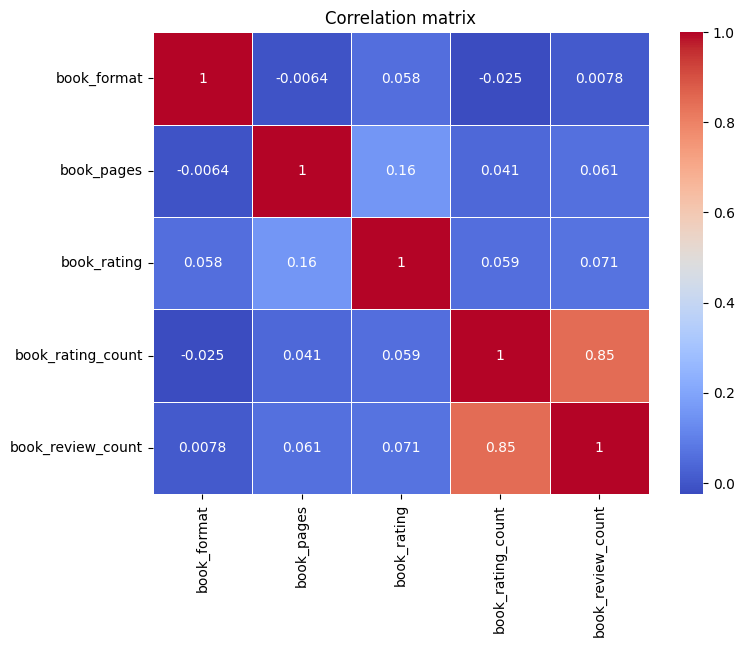

In [23]:
plt.figure(figsize = (8,6))

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

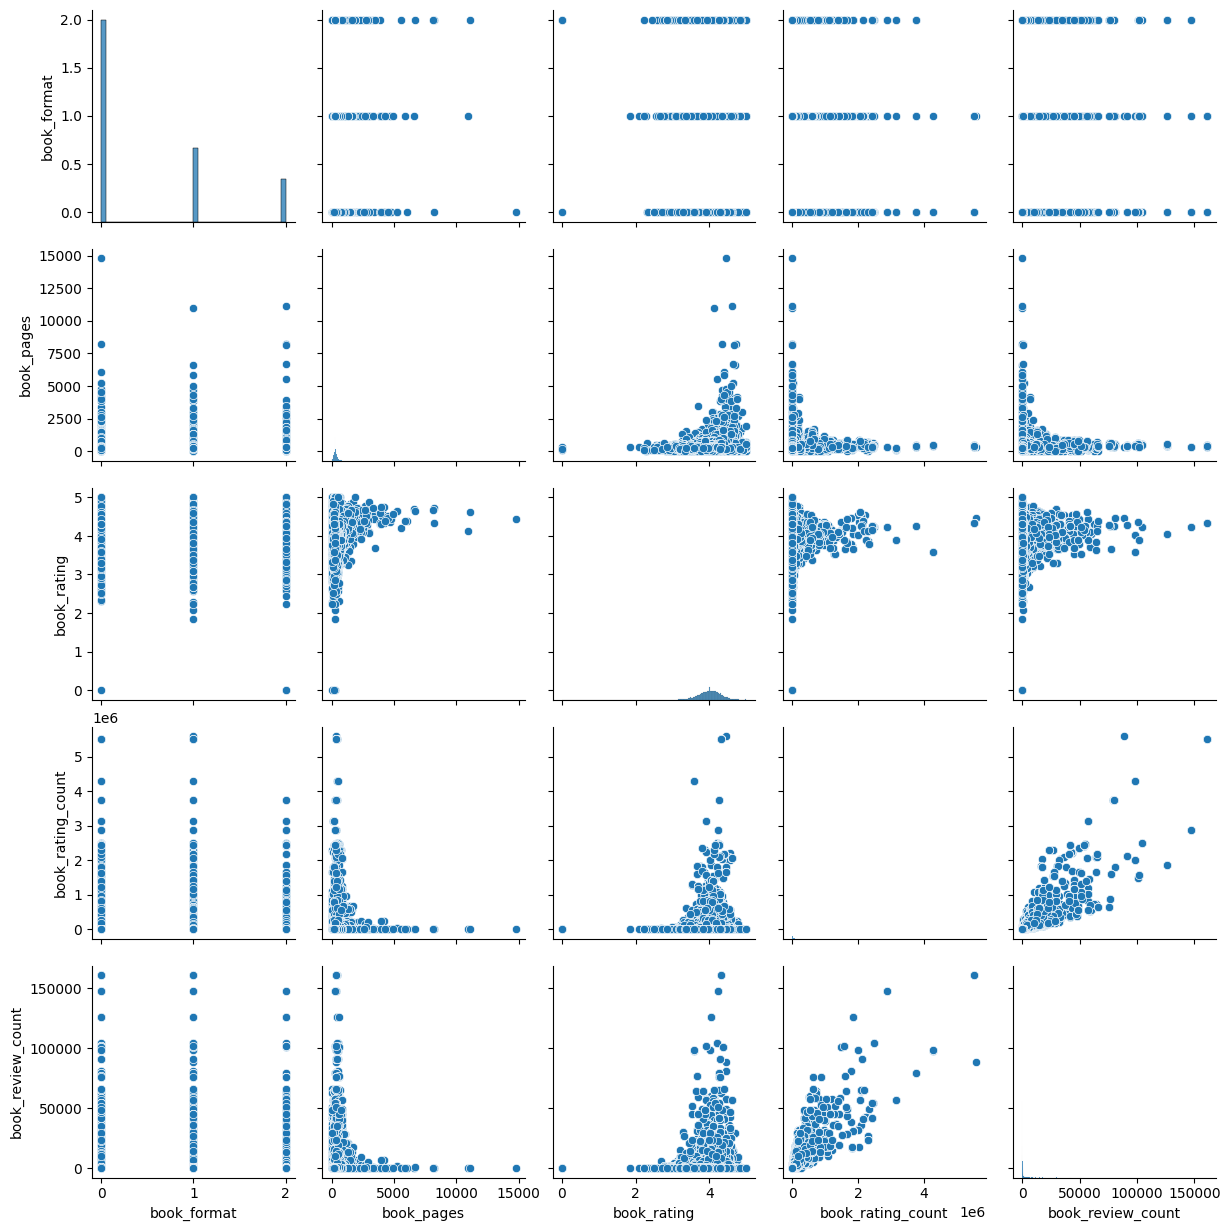

In [24]:
sns.pairplot(df)
plt.show()

Как мы видим из heatmap и pairplot, существует зависимость между **book_rating_count** и **book_review_count**

То есть процент людей, которые после оценки пишут отзыв, примерно один и тот же для любого жанра книг

# Верно ли, что объемные книги оценивают лучше, чем средние по объему?

In [25]:
df1 = df[df['book_pages'] <= 1000]
df2 = df[df['book_pages'] > 1000]

In [26]:
var_analise(df, df1, df2, 'book_rating')

True

In [27]:
res1_mean = df1['book_rating'].mean()
res2_mean = df2['book_rating'].mean()

print(f'Less than 1000 pages: {res1_mean}, more than 1000 pages {res2_mean}')

Less than 1000 pages: 4.001372478887233, more than 1000 pages 4.328392370572207


Немного, но оценка у толстых книг больше. Скорее всего большие по объему книги читают ценители литературы/критики, а обычные люди предпочитают не брать книги больше 1000 страниц 

# Верно ли, что у книг с высоким рейтингом больше отзывов?

In [28]:
df1 = df[df['book_review_count'] <= 500]
df2 = df[df['book_review_count'] > 500]

In [29]:
var_analise(df, df1, df2, 'book_rating')

False

In [30]:
res1_mean = df1['book_rating'].mean()
res2_mean = df2['book_rating'].mean()

print(f'Review count is less than 500: {res1_mean}, review count is more than 500 {res2_mean}')

Review count is less than 500: 4.003862201647328, review count is more than 500 4.010207946945428


Гипотеза не подтвердилась: если книга имеет хороший рейтинг, то это никак не влияет на количество отзывов 

# Верно ли, что у книг с оценкой меньше 3 отзывов больше, чем у книг с хорошим рейтингом?

In [40]:
df1 = df[df['book_rating'] <= 3]
df2 = df[df['book_rating'] > 3]

In [41]:
var_analise(df, df1, df2, 'book_review_count')

True

In [42]:
res1_mean = df1['book_review_count'].mean()
res2_mean = df2['book_review_count'].mean()

print(f'Rating is less than 3: {res1_mean}, rating is more than 3: {res2_mean}')

Rating is less than 3: 226.71875, rating is more than 3: 2144.5483015383406


Гипотеза не подтвердилась: перед тем, как начать читать книгу, люди скорее всего посмотрят ее рейтинг. Это объясняет то, что хорошие книги имеют больше отзывов, так как их читают больше

Гипотеза, что люди, недовольные книгой, будут больше писать негативных отзывов, неверна

# Верно ли, что электронные книги имеют более высокий рейтинг?

In [37]:
df1 = df[df['book_format'] <= 1]
df2 = df[df['book_format'] > 1]

In [38]:
var_analise(df, df1, df2, 'book_rating')

True

In [39]:
res1_mean = df1['book_rating'].mean()
res2_mean = df2['book_rating'].mean()

print(f'Rating of paper books: {res1_mean}, rating of ebooks {res2_mean}')

Rating of paper books: 3.9969046379501574, rating of ebooks 4.064950581395349


Электронные книги имеют оценку чуть выше, но не сильно, чтобы говорить о существовании зависимости

# Выводы

Рейтинг книг распределен относительно нормально, это позволяет проверить гипотезы о зависимости разных параметров и рейтинга

Подтвердилось предположение, что объемные книги оценивают лучше, так как до них скорее всего доходят ценители литературы 

Не подтвердились гипотеза о том, что существует зависимость между количеством отзывов и рейтингом: при выборе книги люди смотрят на рейтинг и выбирают что-то популярное, поэтому у плохих книг мало отзывов, но при этом любая хорошая книга не обязательно должна иметь много отзывов

Верно утверждение, что существует зависимость между количеством отзывов и количеством оценок: примерно одинаковый процент людей доходит до написания отзыва после оценки 

Самый популярный жанр - Fantasy

Самый популярный формат - мягкая обложка 